In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.decomposition import PCA
from sklearn.feature_selection import SelectKBest
import matplotlib.pyplot as plt

In [2]:
# Import the entire dataset
dataset = pd.read_excel('Dataset',sheetname=None)

In [3]:
data = dataset['Supplemental Data - County']
data = data.rename(columns={'FIPS Code':'FIPS','County Name':'County'})

In [4]:
# Merge all the excel worksheets into one DataFrame
for sheet in dataset:
    if 'FIPS' in dataset[sheet]:
        data = pd.merge(dataset[sheet],data,on=['FIPS','State','County']) 

In [5]:
# Filter columns that have many NaN values
for col in data.columns:
    if data[col].isnull().sum() > 100:
        del data[col]
    else:
        data = data[data[col].notnull()]

In [6]:
# DataFrame of only the numeric features
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
numeric_data = data.select_dtypes(include=numerics)

In [7]:
# Pick a target column, save it, and delete it from the data
feature = 'SUPERC12'
target = numeric_data[feature]
del numeric_data[feature]

In [9]:
# Select the k most predictive features of the target column
k_best = SelectKBest(k=4)
k_data = k_best.fit(numeric_data,target)

In [10]:
k_columns = k_data.get_support(True)
numeric_data.columns[k_columns]

Index([u'FFR07', u'SUPERC07', u'CONVS12', u'Population Estimate, 2011'], dtype='object')

In [11]:
# PCA for the k most predictive features
pca = PCA(n_components=1)
reduct_data = pca.fit_transform(numeric_data[numeric_data.columns[k_columns]])
pca.explained_variance_ratio_

array([ 0.99999998])

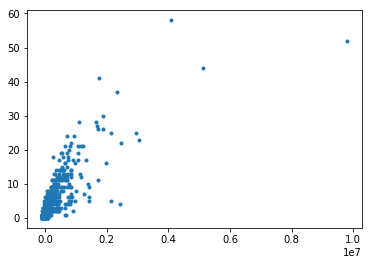

In [12]:
plt.plot(reduct_data,target,'.')
plt.show()

In [13]:
# Divide the data into a training testing subsets
dataX = numeric_data[numeric_data.columns[k_columns]]
datay = target
trainNum = len(dataX)*70/100
ind = np.random.permutation(len(dataX))
trainX = dataX.iloc[ind[:trainNum]]
testX = dataX.iloc[ind[trainNum:]]
trainy = datay.iloc[ind[:trainNum]]
testy = datay.iloc[ind[trainNum:]]

In [14]:
# A linear regression model
regr = linear_model.LinearRegression()
regr.fit(trainX, trainy)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [15]:
# The coefficients
print('Coefficients: \n', regr.coef_)

# The intercept
print('intercept: \n', regr.intercept_)

# The mean squared error
print("Mean squared error: %.6f" % np.mean((regr.predict(testX) - testy) ** 2))

# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % regr.score(testX, testy))

('Coefficients: \n', array([ -1.75176181e-04,   1.05553971e+00,   9.54302802e-03,
         4.77276966e-07]))
('intercept: \n', 0.14503555215058461)
Mean squared error: 0.782942
Variance score: 0.92
